## Final Project Submission

* Student name: Abdullah Al Daffaie 
* Student pace: Full Time
* Scheduled project review date/time: Monday 01/25/2021
* Instructor name: Abhineet
------------------------------------------------------------------------

In [2]:
# Importing needed libraries 
# Read CSV file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

df = pd.read_csv('data/kc_house_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

-Column Names and descriptions for Kings County Data Set-
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target- DEPENDENT 
* **bedroomsNumber** -  of Bedrooms/House- CATEGORICAL
* **bathroomsNumber** -  of bathrooms/bedrooms- CATEGORICAL
* **sqft_livingsquare** -  footage of the home- CONTINUOUS 
* **sqft_lotsquare** -  footage of the lot- CONTINUOUS
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront- CATEGORICAL 
* **view** - Has been viewed- CATEGORICAL
* **condition** - How good the condition is ( Overall )- CATEGORICAL 
* **grade** - overall grade given to the housing unit, based on King County grading system- CATEGORICAL 
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
# Looking for the median to fill NA 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Filled NA with median 
df.fillna({'waterfront': 0, 'view': 0, 'yr_renovated': 0}, inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Built a for loop to show the top 5 most comment values
# Looking for weird values like (/, . , ? , .... etc)
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending= False).head(5))
    print('-------------------------------------------------------------')

id
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64
-------------------------------------------------------------
date
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64
-------------------------------------------------------------
price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64
-------------------------------------------------------------
bedrooms
3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64
-------------------------------------------------------------
bathrooms
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64
-------------------------------------------------------------
sqft_living
1300    0.006390


In [7]:
# replaced weird value (?) in sqft_basement with (0)
df.sqft_basement.replace(to_replace= '?', value = 0, inplace=True )

In [8]:
# Checking if the (?) is replaced with (0)
df['sqft_basement'].value_counts(normalize= True)

0.0       0.593879
0         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1548.0    0.000046
704.0     0.000046
2130.0    0.000046
3480.0    0.000046
1852.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [9]:
# Changing the data type for sqft_basement from Object to Float
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [10]:
# checking if the date type for sqft_basement is correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8214d57eb0>,
      dtype=object)

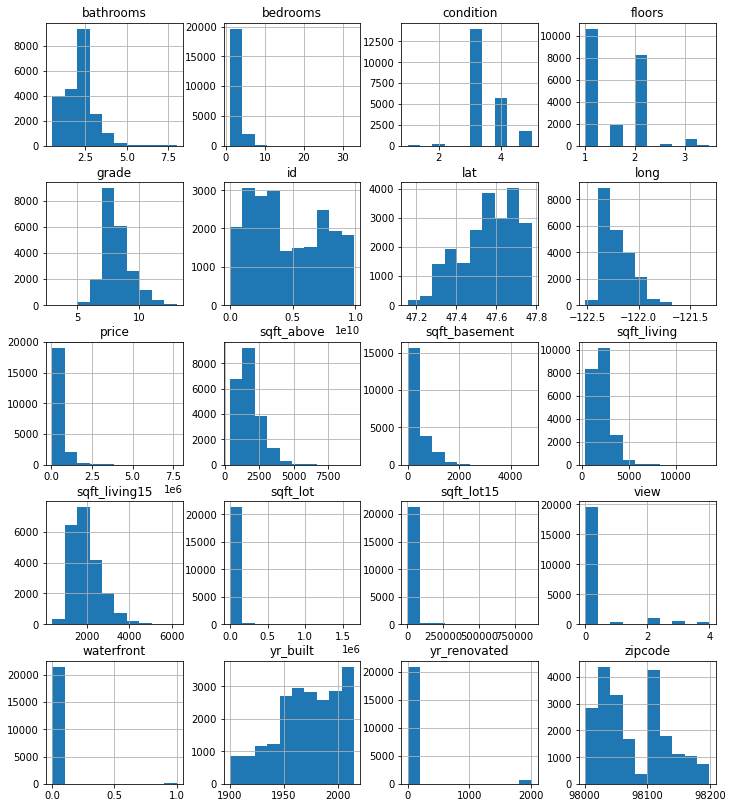

In [12]:
# Graphing all the columns to have an idea of their values 
df.hist(figsize= (12,14))

In [13]:
# Looking at the correlation between all the columns  
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


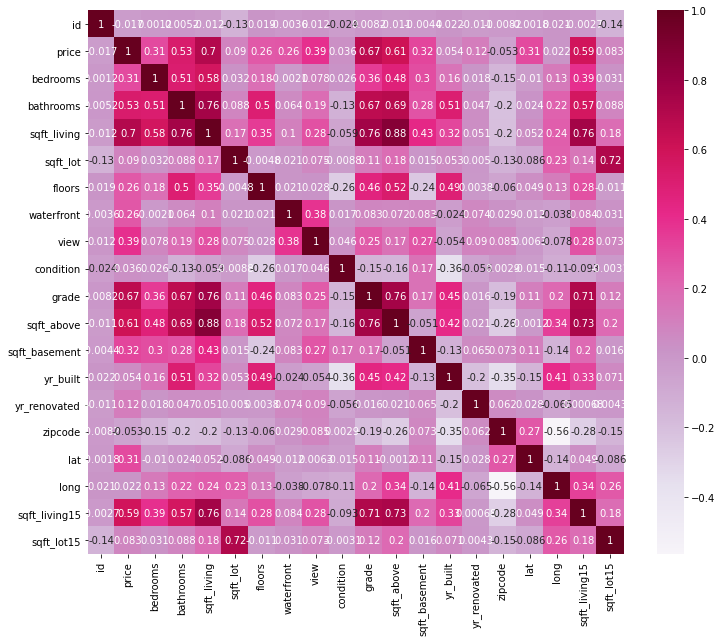

In [14]:
# Graphed a heatmap for all the columns to look for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap= 'PuRd', annot= True)

# -Model 1-

In [15]:
# Imported needed libraries to build Model1 'Price' is my Dep.Variable 
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price', 'date'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [16]:
# Model 1 R-Squared is 70% which is good 
# Pvalue for 'floors' to high Drop the column


model1 = ols(formula= f, data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2652.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:40:40   Log-Likelihood:            -2.9438e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21577   BIC:                         5.890e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.903e+06   2.93e+06      2.355      0.019    1.16e+06    1.26e+07
id            -1.308e-06   4.83e-07     -2.710      0.007   -2.25e-06   -3.62e-07
bedrooms      -3.588e+04   1900.358    -18.883      0.000   -3.96e+04   -3.22e+04
bathrooms      4.162e+04   3262.256     12.758      0.000    3.52e+04     4.8e+04
sqft_living     102.6820     18.074      5.681      0.000      67.256     138.108
sqft_lot          0.1213      0.048      2.527      0.012       0.027       0.215
floors         7073.1630   3600.254      1.965      0.049      16.399    1.41e+04
waterfront     6.177e+05   1.81e+04     34.065      0.000    5.82e+05    6.53e+05
view           5.345e+04   2122.610     25.181      0.000    4.93e+04    5.76e+04
condition      2.673e+04   2346.555     11.390      0.000    2.21e+04    3.13e+04
grade          9.703e+04   2160.721     44.905      0.000    9.28e+04    1.01e+05
sqft_above       78.0135     18.065      4.319      0.000      42.606     113.421
sqft_basement    47.7928     17.904      2.669      0.008      12.699      82.886
yr_built      -2639.0657     71.923    -36.693      0.000   -2780.041   -2498.091
yr_renovated     23.4736      3.977      5.902      0.000      15.678      31.269
zipcode        -584.2557     32.986    -17.712      0.000    -648.910    -519.601
lat            6.003e+05   1.07e+04     55.906      0.000    5.79e+05    6.21e+05
long          -2.157e+05   1.32e+04    -16.375      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.4612      3.450      6.221      0.000      14.699      28.224
sqft_lot15       -0.4017      0.074     -5.463      0.000      -0.546      -0.258
==============================================================================
Omnibus:                    18365.315   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1847074.980
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      47.740   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE: 38644465958.30263
Test MSE: 51403866057.278015
RMSE Train: 196581.95735698286
RMSE Test: 226724.2070385913


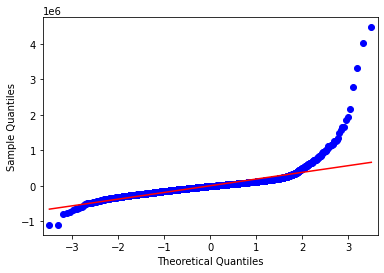

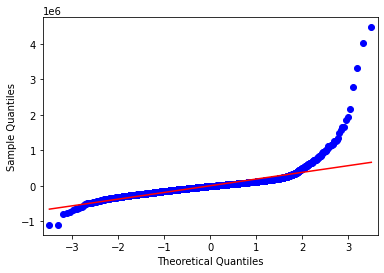

In [17]:
# Model1 needs work 
# 1-clean outliers 2- separate continuous and categorical 3- drop columns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score

data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

# -Model 2-

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# Built  for loop to make a list of continuous and categorical columns 
# Decide which ones to treat as continuous and categorical

conts = []
cats = []

for col in df.columns:
    if(df[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [20]:
conts

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
# CONTINUOUS  

In [22]:
# Looking at the 'bathrooms' values and their counts 
df.bathrooms.value_counts(normalize= True)

2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
5.25    0.000602
5.50    0.000463
1.25    0.000417
6.00    0.000278
5.75    0.000185
0.50    0.000185
8.00    0.000093
6.25    0.000093
6.75    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

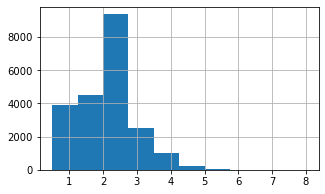

In [23]:
# Graphed the 'bathrooms' values and their counts 

df['bathrooms'].hist(figsize= (5,3))

In [24]:
# Bathrooms
df = df[df['bathrooms'] < 6]

In [25]:
# Looking at the 'sqft_living' values and their counts 

df.sqft_living.value_counts(normalize= True)

1300    0.006395
1400    0.006256
1440    0.006163
1660    0.005977
1010    0.005977
          ...   
460     0.000046
3527    0.000046
380     0.000046
5700    0.000046
2031    0.000046
Name: sqft_living, Length: 1021, dtype: float64

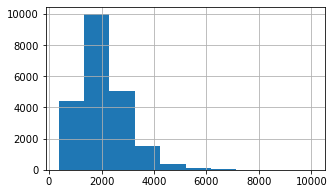

In [26]:
# Graphed the 'Sqft_living' values and their counts 

df['sqft_living'].hist(figsize= (5,3))

In [27]:
# Sqft_living
df = df[df['sqft_living'] < 6000]

In [28]:
# Looking at the 'Price' values and their counts 

df.price.value_counts(normalize= True)

350000.0    0.007990
450000.0    0.007944
550000.0    0.007386
500000.0    0.007061
425000.0    0.006968
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3601, dtype: float64

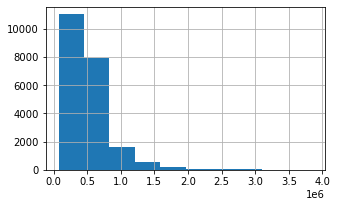

In [29]:
# Graphed the 'price' values and their counts 

df['price'].hist(figsize= (5,3))

In [30]:
# Price
df = df[df['price'] < 1500000]

In [31]:
cats

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [32]:
# CATEGORICAL

In [33]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [34]:
# Looking at the 'Bedrooms' values and their counts 

df.bedrooms.value_counts(normalize= True)

3     0.462156
4     0.314629
2     0.130850
5     0.069179
6     0.011546
1     0.009312
7     0.001425
8     0.000428
9     0.000238
10    0.000143
11    0.000048
33    0.000048
Name: bedrooms, dtype: float64

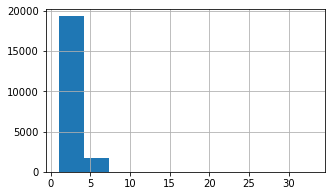

In [35]:
# Graphed the 'Bedrooms' values and their counts 

df['bedrooms'].hist(figsize= (5,3))

In [36]:
#bedrooms
df['bed2'] = df['bedrooms'].map(lambda x: 1 if x < 3 else 0)
df['bed3'] = df['bedrooms'].map(lambda x: 1 if x == 3 else 0)
df['bed4'] = df['bedrooms'].map(lambda x: 1 if x == 4 else 0)
df['bed5'] = df['bedrooms'].map(lambda x: 1 if x== 5 else 0 )
df['bed5+']= df['bedrooms'].map(lambda x : 1 if x > 5 else 0)
df.drop(columns= 'bedrooms', axis= 1, inplace= True)

In [37]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [38]:
# Looking at the 'Condition' values and their counts 

df.condition.value_counts(normalize= True)

3    0.649689
4    0.263505
5    0.077446
2    0.008030
1    0.001330
Name: condition, dtype: float64

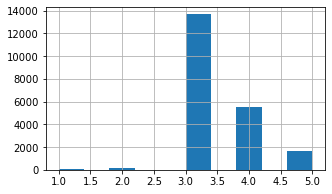

In [39]:
# Graphed the 'Condition' values and their counts 

df['condition'].hist(figsize= (5,3))

In [40]:
# Condition
df['con2_under'] = df['condition'].map(lambda x: 1 if x < 3 else 0)
df['con3'] = df['condition'].map(lambda x: 1 if x == 3 else 0)
df['con4'] = df['condition'].map(lambda x: 1 if x == 4 else 0)
df['con5'] = df['condition'].map(lambda x: 1 if x == 5 else 0)
df.drop(columns= 'condition', axis= 1, inplace= True)

In [41]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10,  4, 12,  3])

In [42]:
# Looking at the 'Grade' values and their counts 

df.grade.value_counts(normalize= True)

7     0.426141
8     0.286882
9     0.119494
6     0.096831
10    0.045327
11    0.011593
5     0.011498
4     0.001283
12    0.000903
3     0.000048
Name: grade, dtype: float64

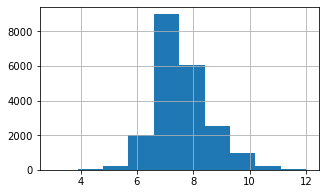

In [43]:
# Graphed the 'Grade' values and their counts 

df['grade'].hist(figsize= (5,3))

In [44]:
# Grade 
df['grade5_under'] = df['grade'].map(lambda x: 1 if x < 6 else 0)
df['grade6'] = df['grade'].map(lambda x: 1 if x == 6 else 0)
df['grade7'] = df['grade'].map(lambda x: 1 if x == 7 else 0)
df['grade8'] = df['grade'].map(lambda x: 1 if x == 8 else 0)
df['grade9'] = df['grade'].map(lambda x: 1 if x == 9 else 0)
df['grade10_up'] = df['grade'].map(lambda x: 1 if x > 9 else 0)
df.drop(columns = 'grade', axis = 1, inplace = True)

In [45]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1970., 1989., 2004., 1986.,
       2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979., 1997.,
       1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968., 2012.,
       1963., 1951., 1962., 1953., 1993., 1998., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [46]:
# Looking at the 'Yr_ renovated' values and their counts 

df.yr_renovated.value_counts(normalize= True)

0.0       0.967739
2014.0    0.003373
2013.0    0.001425
2007.0    0.001283
2000.0    0.001235
            ...   
1934.0    0.000048
1944.0    0.000048
1959.0    0.000048
1976.0    0.000048
1953.0    0.000048
Name: yr_renovated, Length: 70, dtype: float64

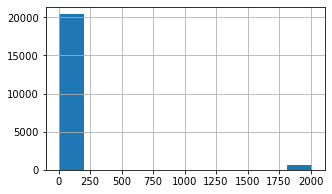

In [47]:
# Graphed the 'Yr_renovated' values and their counts 

df['yr_renovated'].hist(figsize= (5,3))

In [48]:
# Year renovated

df['been_renovated'] =df['yr_renovated'].apply(lambda x: 1 if x >0 else 0)
df['not_renovated'] =df['yr_renovated'].apply(lambda x: 1 if x == 0 else 0)
df.drop(columns = 'yr_renovated', axis= 1 , inplace= True)

In [49]:
# Looking at the 'Sqft_basement' values and their counts 

df.sqft_basement.value_counts(normalize= True)

0.0       0.621514
600.0     0.010215
500.0     0.009788
700.0     0.009598
800.0     0.009360
            ...   
2850.0    0.000048
274.0     0.000048
588.0     0.000048
602.0     0.000048
266.0     0.000048
Name: sqft_basement, Length: 279, dtype: float64

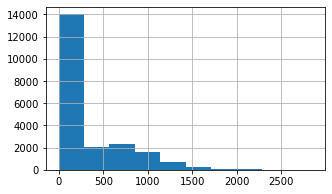

In [50]:
# Graphed the 'sqdt_Basement' values and their counts 

df['sqft_basement'].hist(figsize= (5,3))

In [51]:
# Sqft_ Basement 

df['has_basement'] =df['sqft_basement'].apply(lambda x: 1 if x >0 else 0)
df['no_basement'] =df['sqft_basement'].apply(lambda x: 1 if x == 0 else 0)
df.drop(columns = 'sqft_basement', axis= 1 , inplace= True)

In [52]:
# Check work 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21047 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21047 non-null  int64  
 1   date            21047 non-null  object 
 2   price           21047 non-null  float64
 3   bathrooms       21047 non-null  float64
 4   sqft_living     21047 non-null  int64  
 5   sqft_lot        21047 non-null  int64  
 6   floors          21047 non-null  float64
 7   waterfront      21047 non-null  float64
 8   view            21047 non-null  float64
 9   sqft_above      21047 non-null  int64  
 10  yr_built        21047 non-null  int64  
 11  zipcode         21047 non-null  int64  
 12  lat             21047 non-null  float64
 13  long            21047 non-null  float64
 14  sqft_living15   21047 non-null  int64  
 15  sqft_lot15      21047 non-null  int64  
 16  bed2            21047 non-null  int64  
 17  bed3            21047 non-null 

In [53]:
# -MODEL2-
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price', 'date', 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 
                  'sqft_living15', 'long', 'lat','yr_built', 'view', 'waterfront',
                'floors', 'sqft_lot' ], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [54]:
model2 = ols(formula= f, data = df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1611.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:40:42   Log-Likelihood:            -2.8271e+05
No. Observations:               21047   AIC:                         5.655e+05
Df Residuals:                   21030   BIC:                         5.656e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.711e+05   5680.577     30.116      0.000     1.6e+05    1.82e+05
bathrooms      -8811.3780   2473.109     -3.563      0.000   -1.37e+04   -3963.894
sqft_living      105.5362      2.762     38.206      0.000     100.122     110.950
bed2            4.377e+04    1.1e+04      3.995      0.000    2.23e+04    6.52e+04
bed3           -1.051e+04   1.02e+04     -1.026      0.305   -3.06e+04    9571.926
bed4           -1.686e+04   1.01e+04     -1.676      0.094   -3.66e+04    2861.415
bed5           -6505.9294   1.06e+04     -0.611      0.541   -2.74e+04    1.44e+04
con2_under     -7476.6828   9350.163     -0.800      0.424   -2.58e+04    1.09e+04
con3            7775.2855   3469.327      2.241      0.025     975.137    1.46e+04
con4            5.029e+04   3598.526     13.976      0.000    4.32e+04    5.73e+04
con5            1.205e+05   4452.264     27.062      0.000    1.12e+05    1.29e+05
grade5_under   -1.645e+05   8925.458    -18.430      0.000   -1.82e+05   -1.47e+05
grade6         -1.295e+05   4004.700    -32.328      0.000   -1.37e+05   -1.22e+05
grade7          -6.51e+04   2636.280    -24.693      0.000   -7.03e+04   -5.99e+04
grade8          3.235e+04   2963.712     10.916      0.000    2.65e+04    3.82e+04
grade9          1.755e+05   4164.411     42.142      0.000    1.67e+05    1.84e+05
grade10_up      3.223e+05   5981.993     53.876      0.000    3.11e+05    3.34e+05
been_renovated  1.497e+05   4782.011     31.298      0.000     1.4e+05    1.59e+05
not_renovated   2.141e+04   3768.034      5.682      0.000     1.4e+04    2.88e+04
has_basement    1.115e+05   3224.569     34.571      0.000    1.05e+05    1.18e+05
no_basement      5.96e+04   2969.971     20.068      0.000    5.38e+04    6.54e+04
==============================================================================
Omnibus:                     2809.947   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5852.069
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       4.992   Cond. No.                     3.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 27540574350.439175
Test MSE: 25914843154.64123
RMSE Train: 165953.53069591252
RMSE Test: 160980.878226705


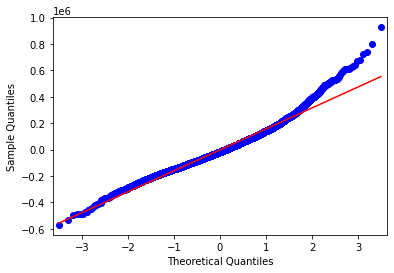

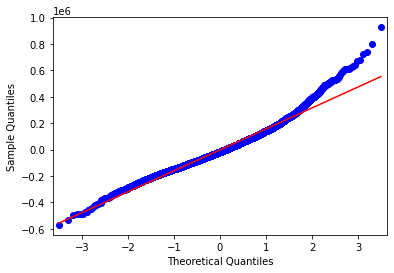

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score

data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 
                  'sqft_living15', 'long', 'lat','yr_built', 'view', 'waterfront',
                'floors', 'sqft_lot'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

# -MODEL3- 

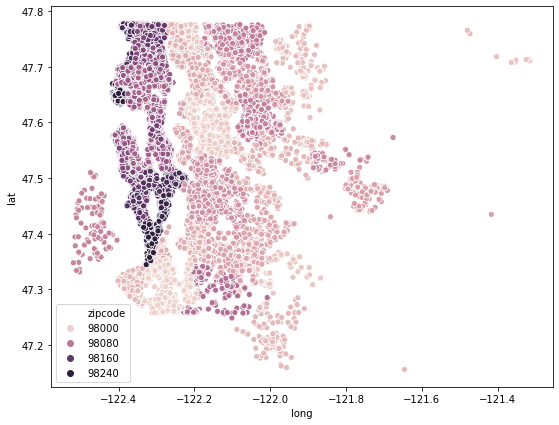

In [56]:
# work on ZipCode, long, lot 
plt.figure(figsize=(9, 7))
sns.scatterplot(x= 'long', y= 'lat', hue= 'zipcode', data= df)

In [57]:
# Made Zipcode Dummies 
zip_dummies = pd.get_dummies(df['zipcode'], prefix = 'zipcode')


In [58]:
df_zip_dummies = pd.concat([df, zip_dummies], axis = 1)


In [59]:
df_zip_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21047 entries, 0 to 21596
Columns: 105 entries, id to zipcode_98199
dtypes: float64(7), int64(27), object(1), uint8(70)
memory usage: 7.2+ MB


In [60]:
# Decided to drop less columns than i did in Model2 with zipdummies 
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df_zip_dummies.drop(['price', 'id', 'sqft_above', 'sqft_lot15', 
                  'sqft_living15', 'sqft_lot','date'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [61]:
model3 = ols(formula= f, data = df_zip_dummies).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1158.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:40:43   Log-Likelihood:            -2.7223e+05
No. Observations:               21047   AIC:                         5.446e+05
Df Residuals:                   20955   BIC:                         5.454e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -286.7072     42.982     -6.670      0.000    -370.956    -202.459
bathrooms       1.782e+04   1726.250     10.324      0.000    1.44e+04    2.12e+04
sqft_living      124.3132      1.791     69.393      0.000     120.802     127.825
floors         -1.491e+04   1960.440     -7.604      0.000   -1.88e+04   -1.11e+04
waterfront       2.39e+05   1.27e+04     18.801      0.000    2.14e+05    2.64e+05
view            4.348e+04   1133.259     38.370      0.000    4.13e+04    4.57e+04
yr_built        -507.2213     41.812    -12.131      0.000    -589.176    -425.267
zipcode         -138.8392     39.537     -3.512      0.000    -216.334     -61.344
lat              1.39e+05   4.01e+04      3.465      0.001    6.04e+04    2.18e+05
long           -6.735e+04   2.87e+04     -2.347      0.019   -1.24e+05   -1.11e+04
bed2            4.974e+04   6766.132      7.351      0.000    3.65e+04     6.3e+04
bed3            5.509e+04   6324.000      8.711      0.000    4.27e+04    6.75e+04
bed4            5.144e+04   6192.404      8.307      0.000    3.93e+04    6.36e+04
bed5            3.655e+04   6513.654      5.612      0.000    2.38e+04    4.93e+04
con2_under     -3.908e+04   5498.601     -7.108      0.000   -4.99e+04   -2.83e+04
con3           -9630.9989   2156.470     -4.466      0.000   -1.39e+04   -5404.151
con4            7557.2128   2195.057      3.443      0.001    3254.731    1.19e+04
con5            4.087e+04   2687.990     15.205      0.000    3.56e+04    4.61e+04
grade5_under   -8.562e+04   5649.712    -15.154      0.000   -9.67e+04   -7.45e+04
grade6         -8.473e+04   2724.692    -31.097      0.000   -9.01e+04   -7.94e+04
grade7         -6.226e+04   1747.797    -35.623      0.000   -6.57e+04   -5.88e+04
grade8         -1.724e+04   1810.674     -9.519      0.000   -2.08e+04   -1.37e+04
grade9          7.331e+04   2511.512     29.188      0.000    6.84e+04    7.82e+04
grade10_up      1.763e+05   3611.730     48.800      0.000    1.69e+05    1.83e+05
been_renovated  1.868e+04   2084.676      8.962      0.000    1.46e+04    2.28e+04
not_renovated  -1.897e+04   2086.832     -9.090      0.000   -2.31e+04   -1.49e+04
has_basement   -1.214e+04    910.028    -13.336      0.000   -1.39e+04   -1.04e+04
no_basement     1.185e+04    901.108     13.150      0.000    1.01e+04    1.36e+04
zipcode_98001  -1.693e+05   1.11e+04    -15.274      0.000   -1.91e+05   -1.48e+05
zipcode_98002  -1.624e+05   1.15e+04    -14.153      0.000   -1.85e+05    -1.4e+05
zipcode_98003   -1.79e+05   1.18e+04    -15.218      0.000   -2.02e+05   -1.56e+05
zipcode_98004   3.815e+05   8226.414     46.373      0.000    3.65e+05    3.98e+05
zipcode_98005   1.271e+05   8801.291     14.446      0.000     1.1e+05    1.44e+05
zipcode_98006   8.419e+04   5099.593     16.509      0.000    7.42e+04    9.42e+04
zipcode_9800

Train MSE: 17748089207.067085
Test MSE: 17161338555.255793
RMSE Train: 133221.95467364637
RMSE Test: 131001.2921892597


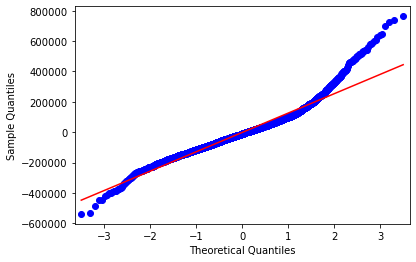

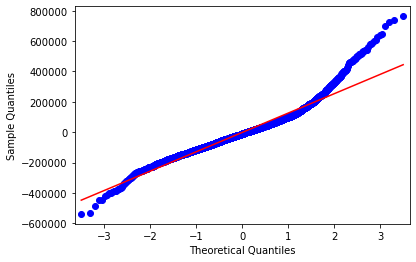

In [62]:

y = data['price']
X = data.drop(['price', 'id', 'sqft_above', 'sqft_lot15', 'date',
                  'sqft_living15', 'sqft_lot'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")